In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"C:\Users\navar\Downloads\3_AdSalePrediction_LR_Classifier\3_AdSalePrediction_LR_Classifier\DigitalAd_dataset.csv")

In [ ]:
df.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [ ]:
df.isnull().sum()

Age       0
Salary    0
Status    0
dtype: int64

In [ ]:
df.nunique()

Age        43
Salary    117
Status      2
dtype: int64

In [ ]:
df.describe()

,Age,Salary,Status
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
df.shape

(400, 3)

# splitting the data

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x = df.drop('Status',axis=1)
y = df['Status']
xtrain , xtest,ytrain , ytest = train_test_split(x,y,train_size=0.8,random_state=42)

# scaling the data 


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# Training

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(xtrain , ytrain)

LogisticRegression()

## predicting whether the customer will buy the product or not

In [ ]:
age = int(input('enter the age:'))
salary = int(input('enter the salary:'))
new_cust = [[age,salary]]
result = lg.predict(sc.transform(new_cust))
print(result)
if result == 1:
    print('customer will buy')
else:
    print('customer wont buy')


[1]
customer will buy


c:\Users\navar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = lg.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
cm = confusion_matrix(ytest , y_pred)
print(cm)
print(classification_report(ytest , y_pred))

[[54  1]
 [13 12]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        55
           1       0.92      0.48      0.63        25

    accuracy                           0.82        80
   macro avg       0.86      0.73      0.76        80
weighted avg       0.84      0.82      0.81        80



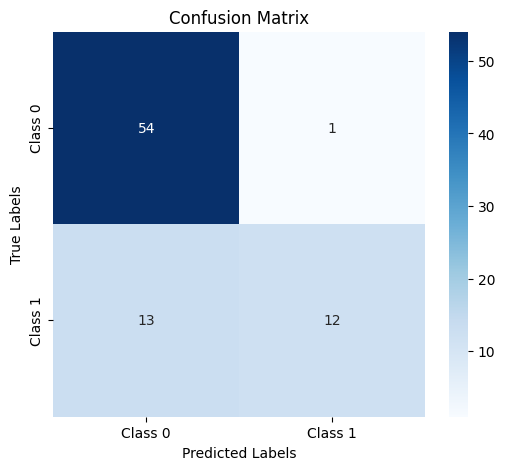

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
